<a href="https://colab.research.google.com/github/sarumathi03/Social-Media-Evaluation-using-Machine-Learning/blob/main/SOCIAL_MEDIA_EVALUATION_USING_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SOCIAL MEDIA EVALUATION USING MACHINE LEARNING 

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Reading the Dataset
data = pd.read_csv("instagram.csv")

In [ ]:
# Rows and Columns
data.shape

(100, 8)

In [ ]:
#To print the information in the given dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:
#Printing username
data.USERNAME

0            mikequindazzi
1          drgorillapaints
2       aitrading_official
3     opensourcedworkplace
4              crea.vision
              ...         
95          michaelgarza__
96             dvlp_search
97              ecom.space
98          lb3enterprises
99            palmariusdev
Name: USERNAME, Length: 100, dtype: object

**Formulating a Fuction to examine the results:**

From the below code , we have used word cloud that is to find and understand the maximum type of words used in Instagram captions and hashtags:

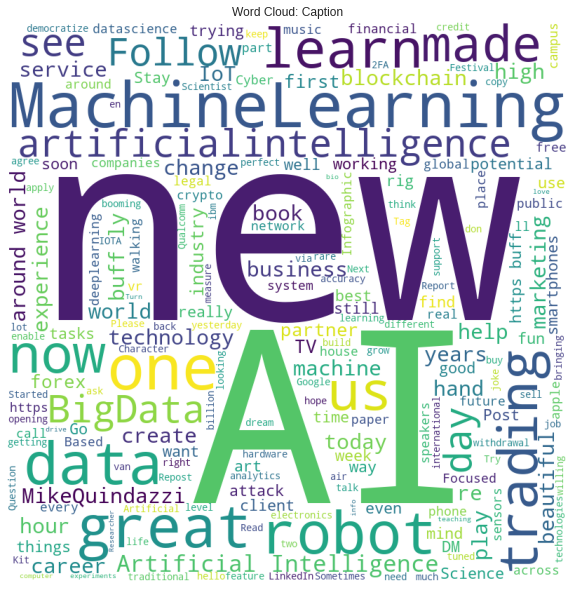

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')

def WordCloudPlotter(dfColumn):
    colData = data[dfColumn]
    textCloud = ''
    
    #text processing
    # converting columns to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.style.use('seaborn-whitegrid')
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show()
#Captions   
WordCloudPlotter('Caption')

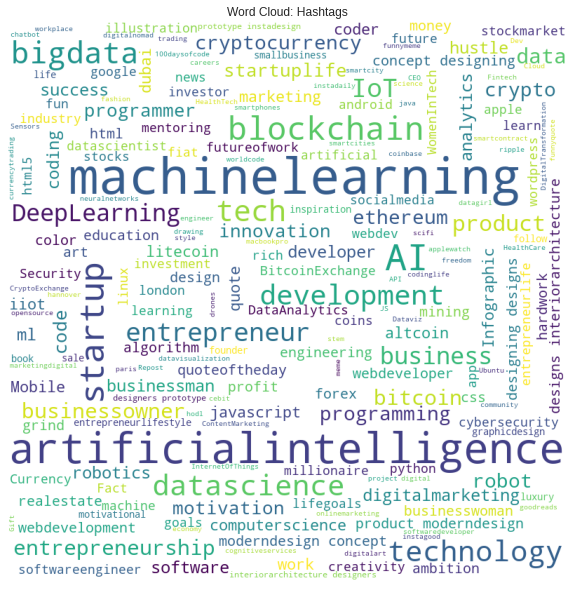

In [ ]:
#Hashtags
WordCloudPlotter('Hashtags')

In [ ]:
data["Time since posted"] = (data["Time since posted"].str.replace(" hours", "")).astype('int')

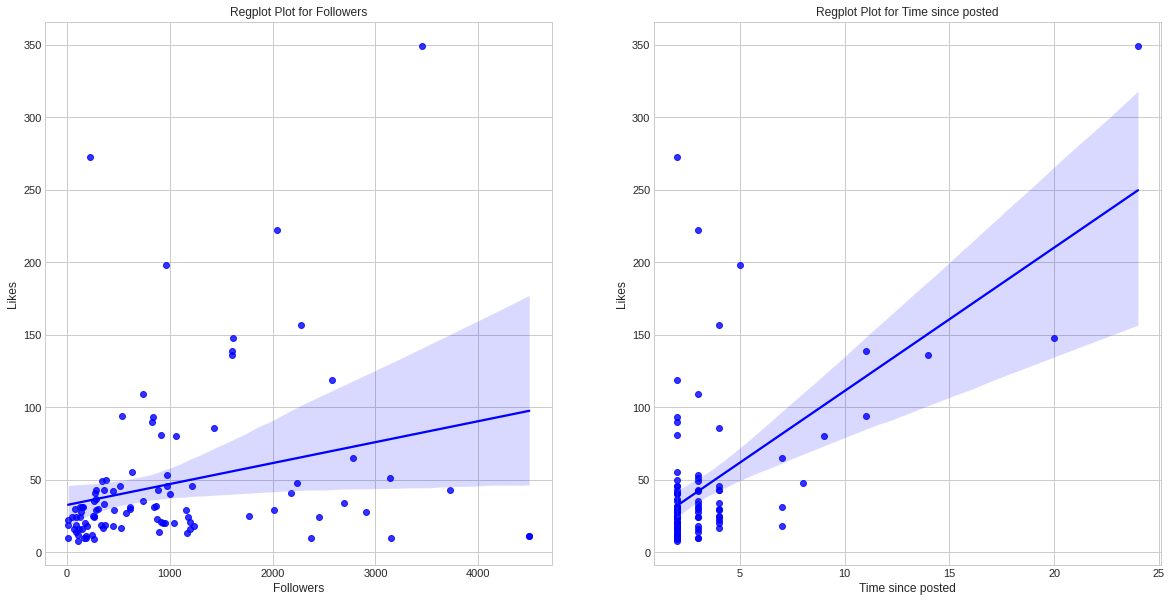

In [ ]:
def PlotData(features):
    plt.figure(figsize= (20, 10))    
    pltNum = 1
    for mem in features:
        plt.subplot(1, 2 , pltNum)
        plt.style.use('seaborn-whitegrid')
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sns.regplot(data = data, x = mem, y = 'Likes' , color = 'blue')
        pltNum += 1
    
    plt.show()
    
PlotData(['Followers', 'Time since posted'])

In [ ]:
import numpy as np
features = np.array(data[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(data['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


**Training the Model:**

In [ ]:
targets = targets/maxValLikes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split           

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(features, targets, test_size = 0.1, random_state = 42)
stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

Gradient Boosting Algorithm:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

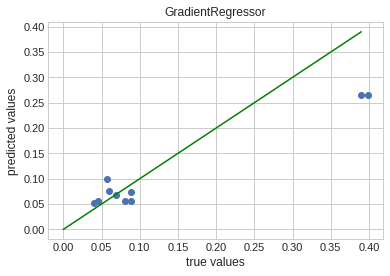

In [ ]:
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.style.use('seaborn-ticks')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

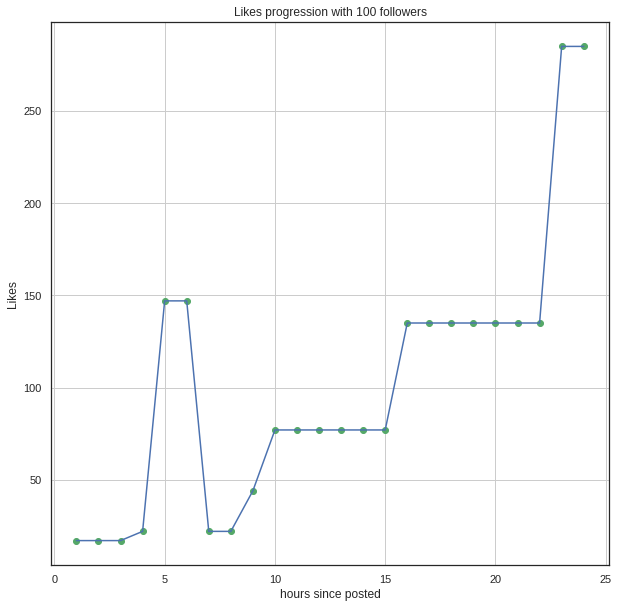

In [ ]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.style.use('seaborn-whitegrid')
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()
# like progression for 100 followers 
PredictionsWithConstantFollowers(gbr,100, stdSc, maxValLikes)

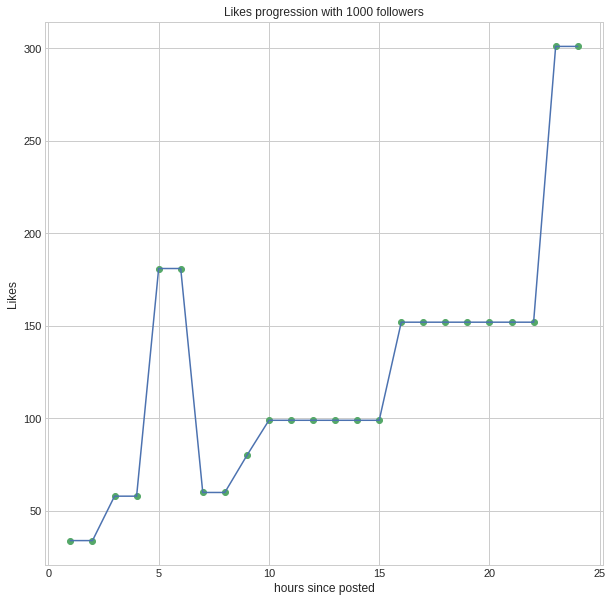

In [ ]:
# likes progression for 1000 followers
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)

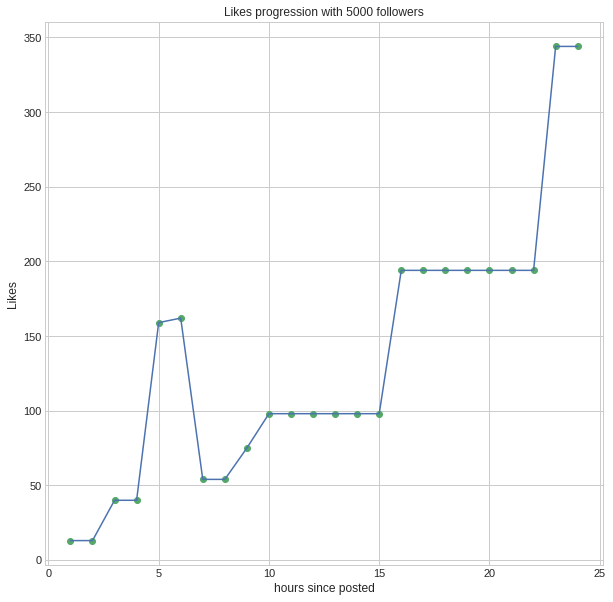

In [ ]:
# Like progression for 5000 followers
PredictionsWithConstantFollowers(gbr, 5000, stdSc, maxValLikes)

**Conclusion:**

From this analysis and predictions of Instagram algorithm, If you have a higher number of subscribers, your post is to get more likes.